In [1]:
import os, sys
import json
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 

from os.path import join 
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from IPython.display import display_html

import warnings
warnings.filterwarnings("ignore")

In [2]:
DataPath = r'D:\GitWork\titanic\data'
OutPath  = r'D:\GitWork\titanic\output'

csv_train = 'train.csv'
csv_test  = 'test.csv'

In [3]:
f_abspath = join(DataPath, csv_train)
df_train = pd.read_csv(f_abspath)

display(df_train.head())
display(df_train.info())
# display(df_train.describe())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [4]:
f_abspath = join(DataPath, csv_test)
df_test = pd.read_csv(f_abspath)

display(df_test.head())
display(df_test.info())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


None

In [5]:
df_data = df_train.append(df_test)
len_train = len(df_train)
print('Num rows for train:', len_train)

display(df_data.head())
# display(df_data.describe())
display(df_data.info())

Num rows for train: 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


None

In [6]:
# For Sex
le_sex = LabelEncoder()
df_data['SexCode'] = le_sex.fit_transform(df_data.Sex)
display(df_data.head())
display(df_data.info())

def encoder2dict(le):
    return {
        le.transform([x])[0]: x for x in le.classes_
    }

dict_sex = encoder2dict(le_sex)
print('Dict sex:'); display(dict_sex)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  SexCode      1309 non-null   int32  
dtypes: float64(3), int32(1), int64(4), object(5)
memory usage: 138.1+ KB


None

Dict sex:


{0: 'female', 1: 'male'}

In [7]:
# For Fare

# Fill fare null valeu
mean_fare = df_data.Fare.mean()
df_data.Fare.fillna(mean_fare, inplace=True)
display(df_data.info())

# Add FareBinCode 
le_fb5 = LabelEncoder()
df_data['FareBin_5'] = pd.qcut(df_data.Fare, 5)
df_data['FareBinCode_5'] = le_fb5.fit_transform(df_data.FareBin_5)
df_data.drop(['FareBin_5'], axis=1, inplace=True)
display(df_data.head())

dict_fb5 = encoder2dict(le_fb5)
print('Dict fare bin:'); display(dict_fb5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  SexCode      1309 non-null   int32  
dtypes: float64(3), int32(1), int64(4), object(5)
memory usage: 138.1+ KB


None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode,FareBinCode_5
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,4
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,4
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


Dict fare bin:


{0: Interval(-0.001, 7.854, closed='right'),
 1: Interval(7.854, 10.5, closed='right'),
 2: Interval(10.5, 21.679, closed='right'),
 3: Interval(21.679, 41.579, closed='right'),
 4: Interval(41.579, 512.329, closed='right')}

In [8]:
# Family Size
df_data['FamilySize'] = df_data.SibSp + df_data.Parch + 1
display(df_data.head())
display(df_data.info())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode,FareBinCode_5,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,4,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,4,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    1309 non-null   int64  
 1   Survived       891 non-null    float64
 2   Pclass         1309 non-null   int64  
 3   Name           1309 non-null   object 
 4   Sex            1309 non-null   object 
 5   Age            1046 non-null   float64
 6   SibSp          1309 non-null   int64  
 7   Parch          1309 non-null   int64  
 8   Ticket         1309 non-null   object 
 9   Fare           1309 non-null   float64
 10  Cabin          295 non-null    object 
 11  Embarked       1307 non-null   object 
 12  SexCode        1309 non-null   int32  
 13  FareBinCode_5  1309 non-null   int32  
 14  FamilySize     1309 non-null   int64  
dtypes: float64(3), int32(2), int64(5), object(5)
memory usage: 153.4+ KB


None

In [9]:
# For connected_survival 

df_data['FamilySize'] = df_data.SibSp + df_data.Parch + 1
df_data['Connected_Survival'] = 0.5

for tk, df_grp in df_data.groupby('Ticket'):
    if (len(df_grp) > 1):
        for idx, row in df_grp.iterrows():
            smax = df_grp.drop(idx).Survived.max()
            smin = df_grp.drop(idx).Survived.min()
            passId = row.PassengerId
            if (smax == 1.0):
                df_data.loc[df_data.PassengerId == passId, 'Connected_Survival'] = 1
            elif (smax == 0.0):
                df_data.loc[df_data.PassengerId == passId, 'Connected_Survival'] = 0

display(df_data.head())
                
# print
print('People keep same ticket: {}'.format(len(df_data)))

num_conn = df_data[df_data.Connected_Survival != 0.5]['Connected_Survival'].count()
print('People have connected infomation: {}'.format(num_conn))

ct = pd.crosstab(df_data.Connected_Survival, df_data.Survived, margins = True, margins_name='Total')
ct['S_Rate'] = (ct[1]/ ct.Total).round(3)
display(ct)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode,FareBinCode_5,FamilySize,Connected_Survival
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,2,0.5
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,4,2,0.5
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,1,0.5
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,4,2,0.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,1,0.5


People keep same ticket: 1309
People have connected infomation: 496


Survived,0.0,1.0,Total,S_Rate
Connected_Survival,,,,
0.0,110,32,142,0.225
0.5,384,163,547,0.298
1.0,55,147,202,0.728
Total,549,342,891,0.384


<AxesSubplot:xlabel='x', ylabel='y'>

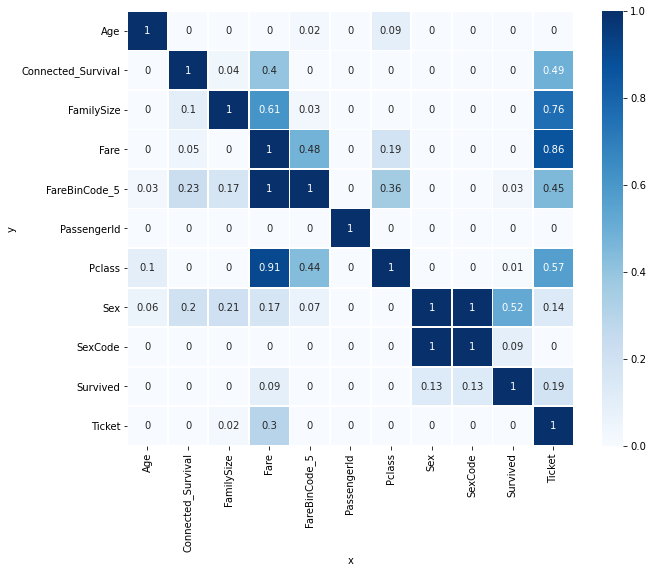

In [10]:
# PPS (Predictive Power Score)
import ppscore as pps # importing ppscore

col_selected = [
    'PassengerId','Survived', 'Sex', 'Pclass', 'Fare', 'Ticket', 'Age', 
    'SexCode', 'FareBinCode_5', 'FamilySize', 'Connected_Survival'
]
df_pps = df_data[col_selected]

fig, ax = plt.subplots(figsize=(10,8)) 
matrix_df = pps.matrix(df_pps)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
matrix_df = matrix_df.apply(lambda x: round(x, 2)) # Rounding matrix_df's values to 0, XX

sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.75, annot=True, ax=ax)

In [11]:
# For Age
features = ['PassengerId', 'Survived', 'Sex', 'Pclass', 'Age']
df_tmp = df_data[features]

df_tmp['Has_Age'] = df_tmp.Age.isnull().map(lambda x: 0 if x else 1)

kwargs = { 'margins': True, 'margins_name': 'Total' }
ct1 = pd.crosstab(df_tmp.Has_Age, df_tmp.Sex, **kwargs)
ct2 = pd.crosstab(df_tmp.Has_Age, df_tmp.Pclass, **kwargs)

def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline;margin:10px"'), raw=True)
    return

display_side_by_side(ct1, ct2)

Sex 
 female 
 male 
 Total 
 
 
 Has_Age 
 
 
 
 
 
 
 
 0 
 78 
 185 
 263 
 
 
 1 
 388 
 658 
 1046 
 
 
 Total 
 466 
 843 
 1309 
 
 
 
 
 
 Pclass 
 1 
 2 
 3 
 Total 
 
 
 Has_Age 
 
 
 
 
 
 
 
 
 0 
 39 
 16 
 208 
 263 
 
 
 1 
 284 
 261 
 501 
 1046 
 
 
 Total 
 323 
 277 
 709 
 1309

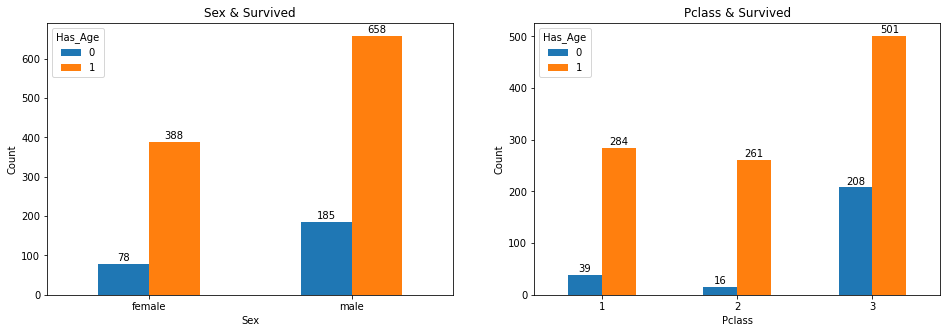

Sex loss rate: {'female': 0.167, 'male': 0.219, 'Total': 0.201}
Pclass loss rate: {1: 0.121, 2: 0.058, 3: 0.293, 'Total': 0.201}


In [12]:
def plotBarUnstack(df_plt, ax, title=None, xlabel=None, ylabel=None):
    ax.set_title('{}'.format(title))
    ax.set_xlabel('{}'.format(xlabel))
    ax.set_ylabel('{}'.format(ylabel))
    df_plt.plot(kind='bar', stacked=False, rot=0, ax=ax)

    for p in ax.patches:
        width  = p.get_width()
        height = p.get_height()
        left, bottom = p.get_xy()
        val = p.get_height()
        ax.annotate(
            '{}'.format(val),
            xy = (left+width/2, height),
            xytext = (0, 1),
            textcoords = "offset points",
            ha = 'center', 
            va = 'bottom'
        )
    return

plot1 = ct1[ct1.columns.drop(['Total'])].drop(['Total']).T
plot2 = ct2[ct2.columns.drop(['Total'])].drop(['Total']).T

fig, axes = plt.subplots(1,2,figsize=(16,5))
plotBarUnstack(plot1, axes[0], 'Sex & Survived', 'Sex', 'Count')
plotBarUnstack(plot2, axes[1], 'Pclass & Survived', 'Pclass', 'Count')
plt.show()

def calRowRatio(df, row1, row2): 
    vals = []
    for x in df.columns.tolist():
        loss_rate = round(df.loc[row1][x]/df.loc[row2][x], 3)
        vals.append(loss_rate)
    return vals

l_rate1 = calRowRatio(ct1, 0, 'Total')
dict_ct1 = dict(zip(ct1.columns, l_rate1))
print('Sex loss rate: {}'.format(dict_ct1))

l_rate2 = calRowRatio(ct2, 0, 'Total')
dict_ct2 = dict(zip(ct2.columns, l_rate2))
print('Pclass loss rate: {}'.format(dict_ct2))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Age          1046 non-null   float64
 4   Has_Age      1309 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 101.4 KB


None

Pclass 1&2: 600
Pclass 1&2 and Survived: 400
Pclass 1&2, Survived and HasAge: 359
Survived: {1.0: 205, 0.0: 154}
Dead:


{Interval(1.931, 8.9, closed='right'): 1,
 Interval(8.9, 15.8, closed='right'): 0,
 Interval(15.8, 22.7, closed='right'): 17,
 Interval(22.7, 29.6, closed='right'): 36,
 Interval(29.6, 36.5, closed='right'): 30,
 Interval(36.5, 43.4, closed='right'): 16,
 Interval(43.4, 50.3, closed='right'): 21,
 Interval(50.3, 57.2, closed='right'): 15,
 Interval(57.2, 64.1, closed='right'): 11,
 Interval(64.1, 71.0, closed='right'): 7}

Alive:


{Interval(0.591, 8.603, closed='right'): 19,
 Interval(8.603, 16.536, closed='right'): 8,
 Interval(16.536, 24.469, closed='right'): 40,
 Interval(24.469, 32.402, closed='right'): 39,
 Interval(32.402, 40.335, closed='right'): 47,
 Interval(40.335, 48.268, closed='right'): 22,
 Interval(48.268, 56.201, closed='right'): 21,
 Interval(56.201, 64.134, closed='right'): 8,
 Interval(64.134, 72.067, closed='right'): 0,
 Interval(72.067, 80.0, closed='right'): 1}

Text(0.5, 1.0, 'Age vs Survived in Pclass = 1 and 2')

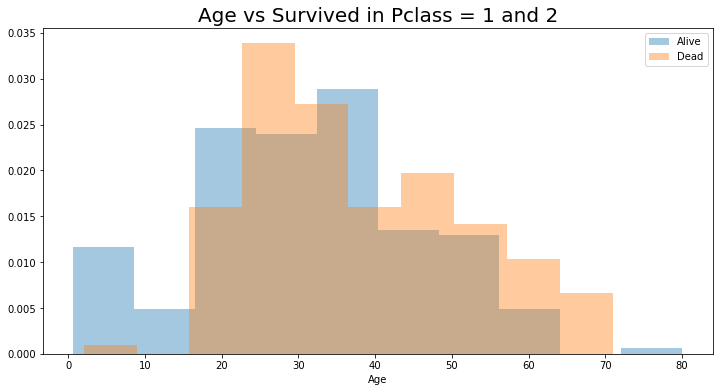

In [110]:
# Masks
col_selected = ['PassengerId', 'Survived', 'Pclass', 'Age']
df_tmp = df_data[col_selected]
df_tmp['Has_Age'] = df_tmp['Age'].isnull().map(lambda x : 0 if x == True else 1)
display(df_tmp.info())

df1 = df_tmp[df_tmp.Pclass != 3]
print('Pclass 1&2:', len(df1))

df1 = df1[df1.Survived.notnull()]
print('Pclass 1&2 and Survived:', len(df1))

df1 = df1[df1.Has_Age==1]
print('Pclass 1&2, Survived and HasAge:', len(df1))

print('Survived:', df1.Survived.value_counts().to_dict())

Mask_Has_Age_P12_Alive = ( (df_tmp.Has_Age == 1) & (df_tmp.Pclass != 3) & (df_tmp.Survived == 1) )
Mask_Has_Age_P12_Dead  = ( (df_tmp.Has_Age == 1) & (df_tmp.Pclass != 3) & (df_tmp.Survived == 0) )

df_s0 = pd.DataFrame({
    'Age': df_tmp.loc[Mask_Has_Age_P12_Dead, 'Age'].values
})
df_s0['AgeBin'] = pd.cut(df_s0.Age, 10)
print('Dead:')
display(df_s0.AgeBin.value_counts().sort_index().to_dict())

df_s1 = pd.DataFrame({
    'Age': df_tmp.loc[Mask_Has_Age_P12_Alive, 'Age'].values
})
df_s1['AgeBin'] = pd.cut(df_s1.Age, 10)
print('Alive:')
display(df_s1.AgeBin.value_counts().sort_index().to_dict())

# Plot
fig, ax = plt.subplots( figsize=(12,6) )
ax = sns.distplot(df_tmp.loc[Mask_Has_Age_P12_Alive, 'Age'],kde=False,bins=10,norm_hist=True,label='Alive') 
ax = sns.distplot(df_tmp.loc[Mask_Has_Age_P12_Dead,  'Age'],kde=False,bins=10,norm_hist=True,label='Dead')
ax.legend()
ax.set_title('Age vs Survived in Pclass = 1 and 2',fontsize = 20)

359 154 205

Age min: 0
Age max: 81


IntervalIndex([(0, 8], (8, 16], (16, 24], (24, 32], (32, 40], (40, 48], (48, 56], (56, 64], (64, 72], (72, 80]],
              closed='right',
              dtype='interval[int64]')

Before: Index([0.0, 1.0, 'Total'], dtype='object', name='Survived')
After : Index([0, 1, 'Total'], dtype='object', name='Survived')


Survived,0,1,Total,Rate0,Rate1
8,1,19,20,0.050,0.950
16,2,8,10,0.200,0.800
24,27,40,67,0.403,0.597
32,37,39,76,0.487,0.513
40,29,47,76,0.382,0.618
48,20,22,42,0.476,0.524
56,18,21,39,0.462,0.538
64,13,8,21,0.619,0.381
72,7,0,7,1.000,0.000
80,0,1,1,0.000,1.000


Ratio dead : {8: 0.006, 16: 0.013, 24: 0.175, 32: 0.24, 40: 0.188, 48: 0.13, 56: 0.117, 64: 0.084, 72: 0.045, 80: 0.0}
Ratio alive: {8: 0.093, 16: 0.039, 24: 0.195, 32: 0.19, 40: 0.229, 48: 0.107, 56: 0.102, 64: 0.039, 72: 0.0, 80: 0.005}


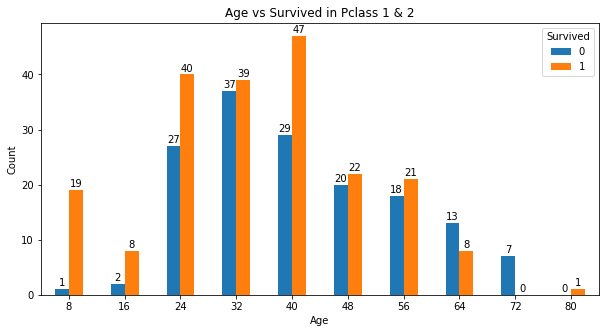

In [133]:
# The effect of age to survival when passenger Pclass is 1 or 2
col_selected = ['PassengerId', 'Survived', 'Pclass', 'Age']
df_tmp = df_data[(df_data.Pclass!=3) & df_data.Survived.notnull() & df_data.Age.notnull()][col_selected]

df_dead  = df_tmp[df_tmp.Survived == 0]
df_alive = df_tmp[df_tmp.Survived == 1]
print(len(df_tmp), len(df_dead), len(df_alive))

age_min = math.floor(df_tmp.Age.min())
age_max = int(df_tmp.Age.max())
if df_tmp.Age.max() >= age_max: age_max += 1
print()
print('Age min:', age_min)
print('Age max:', age_max)

step = math.floor((age_max - age_min) / 10)

bins = [x for x in range(age_min, age_max, step)]
cuts = pd.cut(df_tmp.Age, bins)
display(cuts.cat.categories)

df_tmp['AgeBin'] = cuts.values

le_age = LabelEncoder()
df_tmp['AgeBinCode'] = le_age.fit_transform(df_tmp.AgeBin)

kwagrs = { 'margins': True, 'margins_name': 'Total' }
ct = pd.crosstab(index=df_tmp.AgeBin, columns=df_tmp.Survived, **kwargs)

# print('Before:', ct.columns)
ct.rename(columns={0.0: 0, 1.0: 1}, inplace=True)
# print('After :', ct.columns)

# ct.columns = [('Survived', 0), ('Survived', 1), ('Survived', 'Total')]
# print(ct.columns)

ct['Rate0'] = round(ct[0]/ct['Total'], 3)
ct['Rate1'] = round(ct[1]/ct['Total'], 3)
ct.index = bins[1:] + ['Total']
display(ct)

dict_s0 = round(ct[0]/ct.loc['Total', 0], 3).drop(['Total']).to_dict()
print('Ratio dead :', dict_s0)

dict_s1 = round(ct[1]/ct.loc['Total', 1], 3).drop(['Total']).to_dict()
print('Ratio alive:', dict_s1)

df_plt = ct[ct.columns.drop(['Total','Rate0','Rate1'])].drop(['Total'])
df_plt.index = bins[1:]
df_plt.index.name = 'Age'

fig, ax = plt.subplots(figsize=(10,5))
plotBarUnstack(df_plt,  ax, 'Age vs Survived in Pclass 1 & 2', 'Age', 'Count')
plt.show()